# Team 5: Universal Basic Income
### Author: Yingjie Ouyang

In this notebook, I will be analyzing the relationship between number of workers in the family, education level, and and poverty level to explore "How many members in families are employed and working? Is there any correlation between income and work experience, or income and education level?"

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## B19129
This census table contains information on aggregate family income in the past 12 months (2021) by number of workers in the family.

In [2]:
b19129 = pd.read_csv("data/B19129.csv").copy()
b19129.set_index('Label (Grouping)', inplace=True)

b19129.columns = [x.split('Census Tract ')[1].split(',')[0] for x in b19129.columns]
b19129.index = [x.strip().replace(":", "") for x in b19129.index]
b19129 = b19129.apply(lambda x: x.str.replace('%', '').str.replace('±', '').str.replace(',', ''), axis=1)
b19129 = b19129.T
for col in b19129.columns:
    b19129[col] = pd.to_numeric(b19129[col], errors='coerce')

print("Percentage of null values:")
print(b19129.isna().sum() / len(b19129.index))
b19129.head()

Percentage of null values:
Aggregate family income in the past 12 months (in 2021 inflation-adjusted dollars)    0.697872
No workers (dollars)                                                                  0.714894
1 worker (dollars)                                                                    0.702128
2 workers, both spouses worked (dollars)                                              0.697872
2 workers, other (dollars)                                                            0.719149
3 or more workers, both spouses worked (dollars)                                      0.740426
3 or more workers, other (dollars)                                                    0.748936
dtype: float64


,Aggregate family income in the past 12 months (in 2021 inflation-adjusted dollars),No workers (dollars),1 worker (dollars),"2 workers, both spouses worked (dollars)","2 workers, other (dollars)","3 or more workers, both spouses worked (dollars)","3 or more workers, other (dollars)"
1.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.02,68259600.0,932800.0,7817600.0,26543600.0,3750500.0,29215000.0,NaN
2.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
def add_labels(x, y, length=5):
    y_string = [f'{val:,}' for val in list(map(int, y))]
    for i in range(length):
        plt.text(i, y[i], y_string[i], ha = 'center')

bottom_income_0 = b19129.sort_values(by=['No workers (dollars)'])['No workers (dollars)']
bottom_income_1 = b19129.sort_values(by=['1 worker (dollars)'])['1 worker (dollars)']
bottom_income_2_spouses = b19129.sort_values(by=['2 workers, both spouses worked (dollars)'])['2 workers, both spouses worked (dollars)']
bottom_income_2_other = b19129.sort_values(by=['2 workers, other (dollars)'])['2 workers, other (dollars)']
bottom_income_3_spouses = b19129.sort_values(by=['3 or more workers, both spouses worked (dollars)'])['3 or more workers, both spouses worked (dollars)']
bottom_income_3_other = b19129.sort_values(by=['3 or more workers, other (dollars)'])['3 or more workers, other (dollars)']

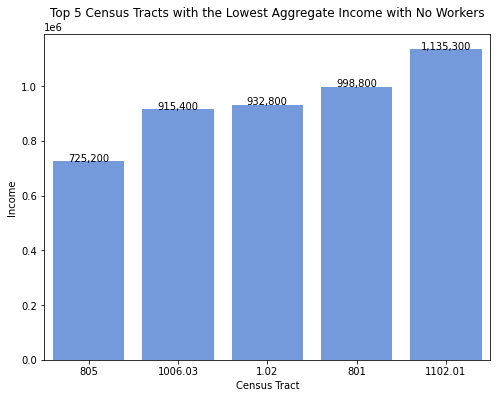

In [4]:
plt.figure(figsize=(8, 6))
x0 = bottom_income_0[:5].index
y0 = bottom_income_0[:5].values

ax = sns.barplot(data=b19129, x=x0, y=y0, color='cornflowerblue')
ax.set(xlabel='Census Tract', ylabel='Income', title='Top 5 Census Tracts with the Lowest Aggregate Income with No Workers')
add_labels(x0, y0)

plt.show()

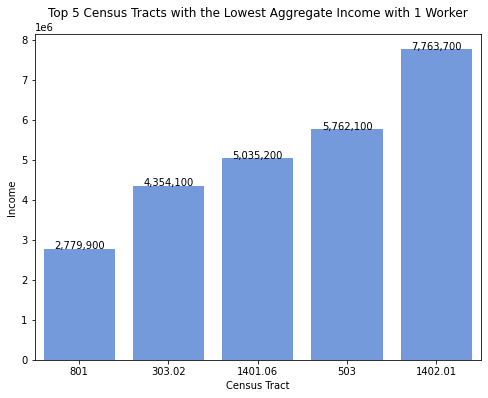

In [5]:
plt.figure(figsize=(8, 6))
x1 = bottom_income_1[:5].index
y1 = bottom_income_1[:5].values

ax = sns.barplot(data=b19129, x=x1, y=y1, color='cornflowerblue')
ax.set(xlabel='Census Tract', ylabel='Income', title='Top 5 Census Tracts with the Lowest Aggregate Income with 1 Worker')
add_labels(x1, y1)

plt.show()

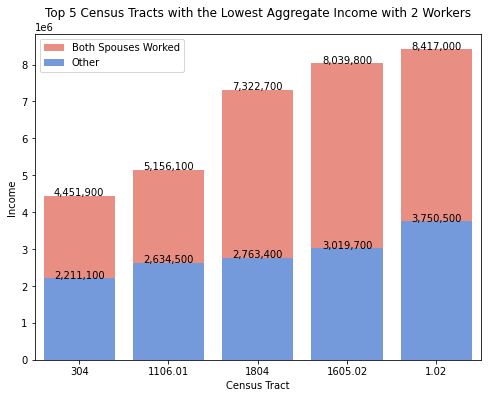

In [6]:
x2_spouses = bottom_income_2_spouses[:5].index
y2_spouses = bottom_income_2_spouses[:5].values
x2_other = bottom_income_2_other[:5].index
y2_other = bottom_income_2_other[:5].values

fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.barplot(data=b19129, x=x2_spouses, y=y2_spouses, label='Both Spouses Worked', color='salmon')
ax = sns.barplot(data=b19129, x=x2_other, y=y2_other, label='Other', color='cornflowerblue')
ax.set(xlabel='Census Tract', ylabel='Income', title='Top 5 Census Tracts with the Lowest Aggregate Income with 2 Workers')
add_labels(x2_spouses, y2_spouses)
add_labels(x2_other, y2_other)
plt.legend()

plt.show()

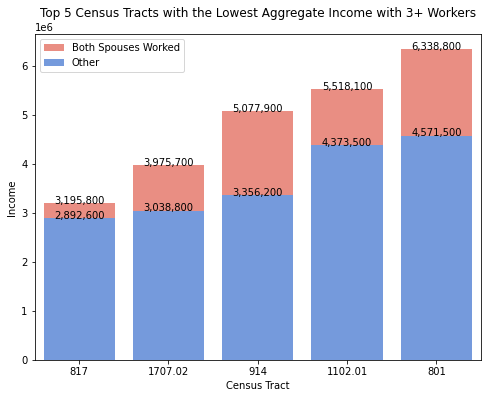

In [7]:
x3_spouses = bottom_income_3_spouses[:5].index
y3_spouses = bottom_income_3_spouses[:5].values
x3_other = bottom_income_3_other[:5].index
y3_other = bottom_income_3_other[:5].values

fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.barplot(data=b19129, x=x3_spouses, y=y3_spouses, label='Both Spouses Worked', color='salmon')
ax = sns.barplot(data=b19129, x=x3_other, y=y3_other, label='Other', color='cornflowerblue')
ax.set(xlabel='Census Tract', ylabel='Income', title='Top 5 Census Tracts with the Lowest Aggregate Income with 3+ Workers')
add_labels(x3_spouses, y3_spouses)
add_labels(x3_other, y3_other)
plt.legend()

plt.show()

Looking at top 5 census tracts with lowest income by workers, houses with more workers make more than houses with less workers, which is understandable. In addition, houses with married couples make noticeably more, and families that make the most are two-worker households where the workers are married.

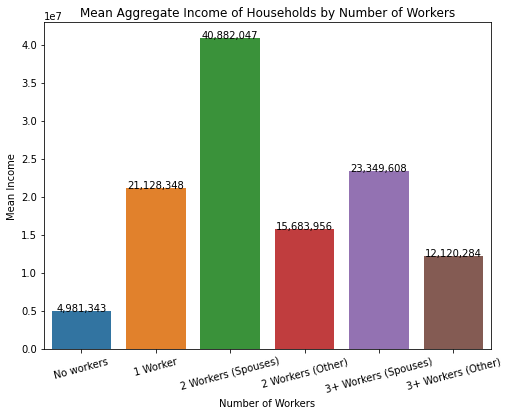

In [8]:
mean0 = b19129['No workers (dollars)'].mean()
mean1 = b19129['1 worker (dollars)'].mean()
mean2_spouses = b19129['2 workers, both spouses worked (dollars)'].mean()
mean2_other = b19129['2 workers, other (dollars)'].mean()
mean3_spouses = b19129['3 or more workers, both spouses worked (dollars)'].mean()
mean3_other = b19129['3 or more workers, other (dollars)'].mean()

x = ["No workers", "1 Worker", "2 Workers (Spouses)", "2 Workers (Other)", "3+ Workers (Spouses)", "3+ Workers (Other)"]
means = [mean0, mean1, mean2_spouses, mean2_other, mean3_spouses, mean3_other]

plt.figure(figsize=(8, 6))
ax = sns.barplot(data=b19129, x=x, y=means)
add_labels(x, means, len(means))
plt.xticks(rotation=15)
ax.set(xlabel='Number of Workers', ylabel='Mean Income', title='Mean Aggregate Income of Households by Number of Workers')

plt.show()

The group with the highest mean aggregate income is households with two workers containing a married couple. Compared to households with two workers unmarried, the difference is noticeable. In addition, the mean aggregate income of households with 3+ workers containing a married couple is also lower than the mean aggregate income of households with 2 workers containing a married couple by almost half. Households with the lowest mean aggregate income are, understandably, households with no workers.

## B17014
This census table contains information on the poverty status of families by number of workers in the family.

In [9]:
b17014 = pd.read_csv("data/B17014.csv").copy()
b17014.set_index('Label (Grouping)', inplace=True)
b17014.index = [x.strip().replace(":", "") for x in b17014.index]
b17014.columns = [x.split('Census Tract ')[1].split(',')[0] for x in b17014.columns]
b17014 = b17014.astype(str).apply(lambda x: x.str.replace('%', '').str.replace('±', '').str.replace(',', '')).astype(int)
b17014 = b17014.T

print("Percentage of null values:")
print(b17014.isna().sum() / len(b17014.index))
b17014.head()

Percentage of null values:
Total                                                     0.0
Income in the past 12 months below poverty level          0.0
Married-couple family                                     0.0
No workers                                                0.0
1 worker                                                  0.0
2 workers                                                 0.0
3 or more workers                                         0.0
Other families                                            0.0
Male householder, no spouse present                       0.0
No workers                                                0.0
1 worker                                                  0.0
2 workers                                                 0.0
3 or more workers                                         0.0
Female householder, no spouse present                     0.0
No workers                                                0.0
1 worker                                   

,Total,Income in the past 12 months below poverty level,Married-couple family,No workers,1 worker,2 workers,3 or more workers,Other families,"Male householder, no spouse present",No workers,...,"Male householder, no spouse present",No workers,1 worker,2 workers,3 or more workers,"Female householder, no spouse present",No workers,1 worker,2 workers,3 or more workers
1.01,191,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,25,0,1,12,12
1.02,611,83,0,0,0,0,0,83,4,4,...,20,0,20,0,0,58,0,21,37,0
2.01,682,79,79,7,72,0,0,0,0,0,...,62,0,62,0,0,63,0,41,22,0
2.02,723,149,44,2,30,12,0,105,0,0,...,18,0,8,10,0,181,4,93,68,16
3.01,379,18,18,0,0,18,0,0,0,0,...,7,0,0,0,7,129,71,32,26,0


In [10]:
b17014.columns

Index(['Total', 'Income in the past 12 months below poverty level',
       'Married-couple family', 'No workers', '1 worker', '2 workers',
       '3 or more workers', 'Other families',
       'Male householder, no spouse present', 'No workers', '1 worker',
       '2 workers', '3 or more workers',
       'Female householder, no spouse present', 'No workers', '1 worker',
       '2 workers', '3 or more workers',
       'Income in the past 12 months at or above poverty level',
       'Married-couple family', 'No workers', '1 worker', '2 workers',
       '3 or more workers', 'Other families',
       'Male householder, no spouse present', 'No workers', '1 worker',
       '2 workers', '3 or more workers',
       'Female householder, no spouse present', 'No workers', '1 worker',
       '2 workers', '3 or more workers'],
      dtype='object')

In [11]:
below_poverty = b17014.loc[:, 'Income in the past 12 months below poverty level' :
                          'Income in the past 12 months at or above poverty level'].iloc[:, :-1]
below_poverty

,Income in the past 12 months below poverty level,Married-couple family,No workers,1 worker,2 workers,3 or more workers,Other families,"Male householder, no spouse present",No workers,1 worker,2 workers,3 or more workers,"Female householder, no spouse present",No workers,1 worker,2 workers,3 or more workers
1.01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1.02,83,0,0,0,0,0,83,4,4,0,0,0,79,11,68,0,0
2.01,79,79,7,72,0,0,0,0,0,0,0,0,0,0,0,0,0
2.02,149,44,2,30,12,0,105,0,0,0,0,0,105,53,0,52,0
3.01,18,18,0,0,18,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9816,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9817,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9818,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9819,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Plotting the top 5 census tracts with families below poverty.

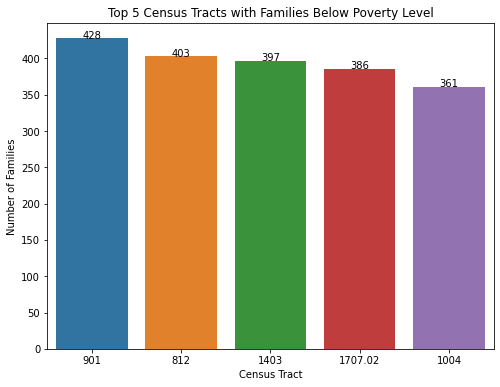

In [12]:
top_households_below_poverty = below_poverty.sort_values(by=['Income in the past 12 months below poverty level'],
                                                        ascending=False)

plt.figure(figsize=(8, 6))
x = top_households_below_poverty.iloc[:5].index
y = top_households_below_poverty.iloc[:5]['Income in the past 12 months below poverty level'].values

ax = sns.barplot(data=top_households_below_poverty.iloc[:5], x=x, y='Income in the past 12 months below poverty level')
ax.set(xlabel='Census Tract', ylabel='Number of Families', title='Top 5 Census Tracts with Families Below Poverty Level')
add_labels(x, y)

plt.show()

**Analyzing poverty levels for Married-Couple Families**

Let's look at the relationship between number of families below the poverty line and number of workers in married-couple families.

In [13]:
married_couple_poverty = below_poverty.loc[:, 'Married-couple family' :
                          'Other families'].iloc[:, :-1]
married_couple_poverty

,Married-couple family,No workers,1 worker,2 workers,3 or more workers
1.01,0,0,0,0,0
1.02,0,0,0,0,0
2.01,79,7,72,0,0
2.02,44,2,30,12,0
3.01,18,0,0,18,0
...,...,...,...,...,...
9816,0,0,0,0,0
9817,0,0,0,0,0
9818,0,0,0,0,0
9819,0,0,0,0,0


In [14]:
def make_pie(data, labels, title, colors=sns.color_palette("Paired")):
    plt.figure(figsize=(8, 8))

    ax = plt.pie(data, labels=labels,
                autopct='%.0f%%', colors=colors, textprops={'fontsize': 15}, shadow=True)
    plt.title(title, fontsize=18)

    plt.show()

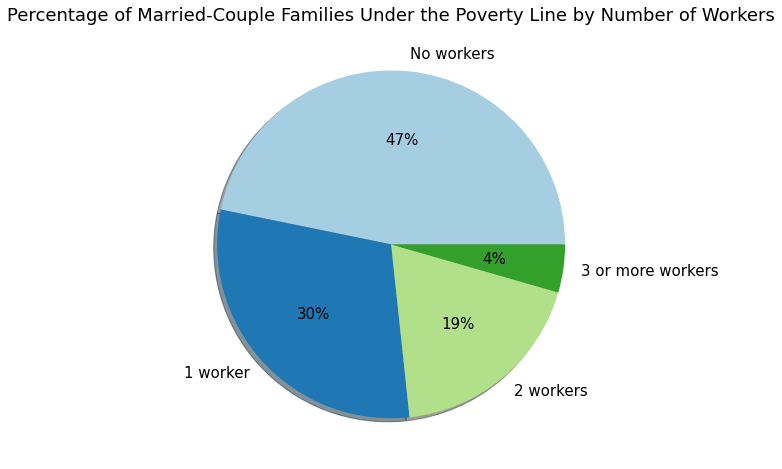

In [15]:
make_pie(married_couple_poverty.mean().values[1:], married_couple_poverty.mean().index[1:],
        'Percentage of Married-Couple Families Under the Poverty Line by Number of Workers')

On average, more families with married couples under the poverty line are likely to have no workers than 1, 2, or 3 or more workers. However, families under the poverty line are more likely to have at least one worker than no workers at all.

We will do the same for above poverty.

In [16]:
above_poverty = b17014.loc[:, 'Income in the past 12 months at or above poverty level' :]
above_poverty

,Income in the past 12 months at or above poverty level,Married-couple family,No workers,1 worker,2 workers,3 or more workers,Other families,"Male householder, no spouse present",No workers,1 worker,2 workers,3 or more workers,"Female householder, no spouse present",No workers,1 worker,2 workers,3 or more workers
1.01,191,166,16,42,85,23,25,0,0,0,0,0,25,0,1,12,12
1.02,528,450,27,49,231,143,78,20,0,20,0,0,58,0,21,37,0
2.01,603,478,26,42,335,75,125,62,0,62,0,0,63,0,41,22,0
2.02,574,375,23,25,278,49,199,18,0,8,10,0,181,4,93,68,16
3.01,361,225,49,38,95,43,136,7,0,0,0,7,129,71,32,26,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9816,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9817,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9818,17,5,5,0,0,0,12,0,0,0,0,0,12,0,12,0,0
9819,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


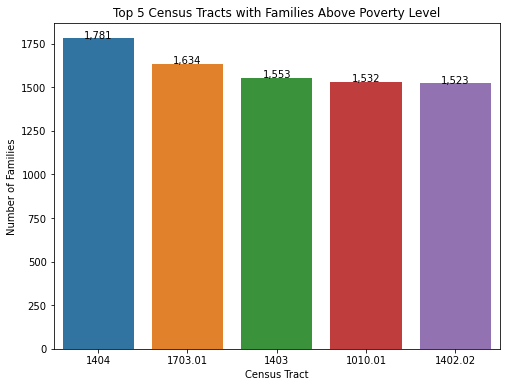

In [17]:
top_households_above_poverty = above_poverty.sort_values(by=['Income in the past 12 months at or above poverty level'],
                                                        ascending=False)

plt.figure(figsize=(8, 6))
x = top_households_above_poverty.iloc[:5].index
y = top_households_above_poverty.iloc[:5]['Income in the past 12 months at or above poverty level'].values

ax = sns.barplot(data=top_households_above_poverty.iloc[:5], x=x, y='Income in the past 12 months at or above poverty level')
ax.set(xlabel='Census Tract', ylabel='Number of Families', title='Top 5 Census Tracts with Families Above Poverty Level')

add_labels(x, y)
        
plt.show()

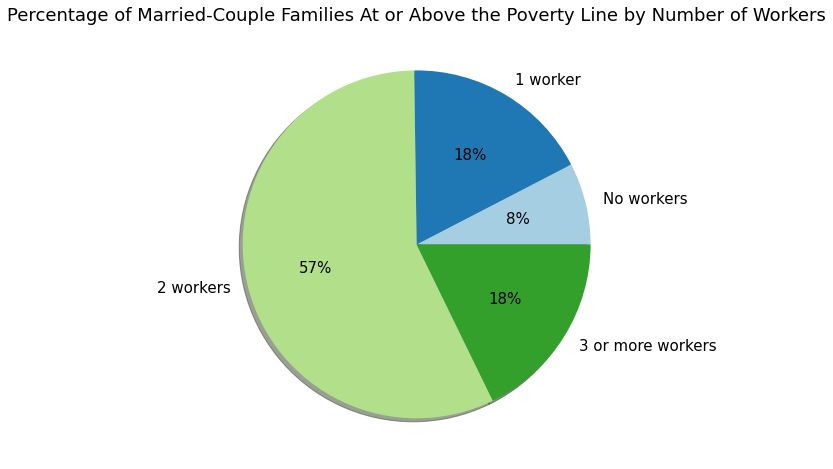

In [18]:
married_couple_above = above_poverty.loc[:, 'Married-couple family' :
                          'Other families'].iloc[:, :-1]

make_pie(married_couple_above.mean().values[1:], married_couple_above.mean().index[1:],
        'Percentage of Married-Couple Families At or Above the Poverty Line by Number of Workers')

The greatest percentage of married-couple families at or above poverty level have two workers. The lowest percentage of married-couple families at or above poverty level have no workers.

**Analyzing poverty levels for Male/Female Head of House, Unmarried**

In [19]:
male_householder_poverty = below_poverty.loc[:, 'Male householder, no spouse present' :
                          'Female householder, no spouse present'].iloc[:, :-1]
female_householder_poverty = below_poverty.loc[:, 'Female householder, no spouse present':]

male_householder_above = above_poverty.loc[:, 'Male householder, no spouse present' :
                          'Female householder, no spouse present'].iloc[:, :-1]
female_householder_above = above_poverty.loc[:, 'Female householder, no spouse present':]

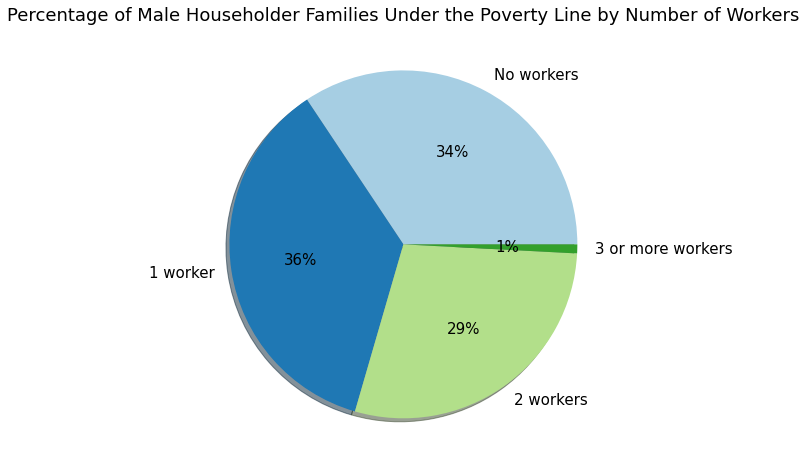

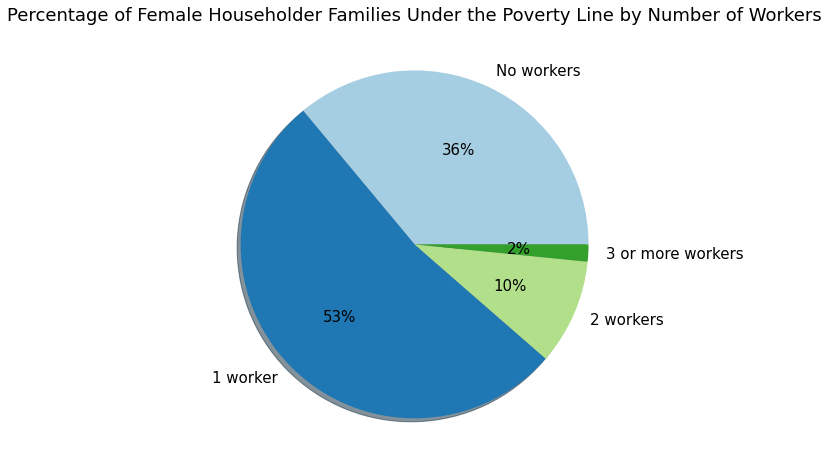

In [20]:
make_pie(male_householder_poverty.mean().values[1:], male_householder_poverty.mean().index[1:],
        'Percentage of Male Householder Families Under the Poverty Line by Number of Workers')
make_pie(female_householder_poverty.mean().values[1:], female_householder_poverty.mean().index[1:],
        'Percentage of Female Householder Families Under the Poverty Line by Number of Workers')

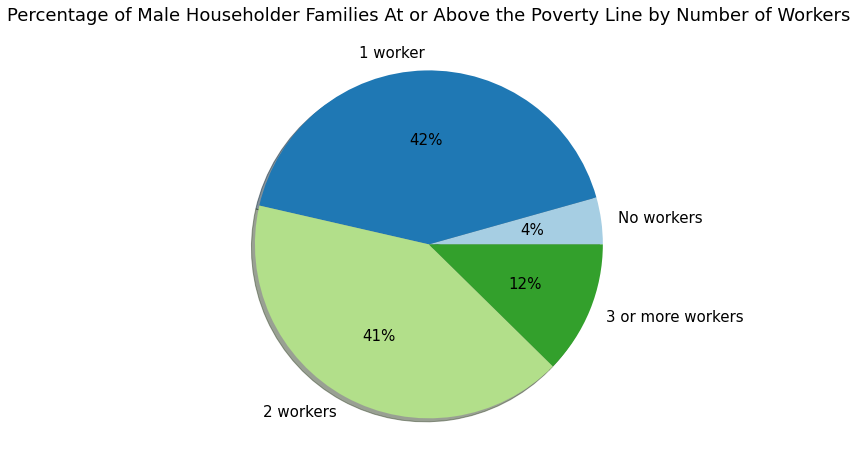

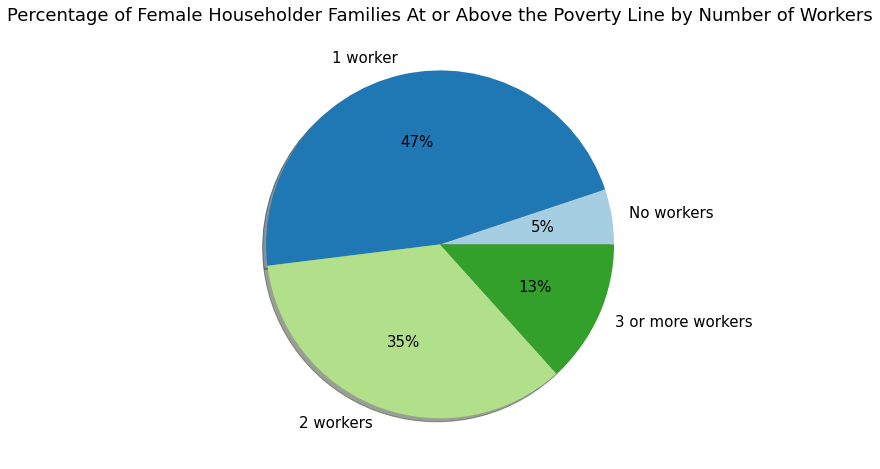

In [21]:
make_pie(male_householder_above.mean().values[1:], male_householder_above.mean().index[1:],
        'Percentage of Male Householder Families At or Above the Poverty Line by Number of Workers')
make_pie(female_householder_above.mean().values[1:], female_householder_above.mean().index[1:],
        'Percentage of Female Householder Families At or Above the Poverty Line by Number of Workers')

**Analyzing poverty levels of different households by number of workers**

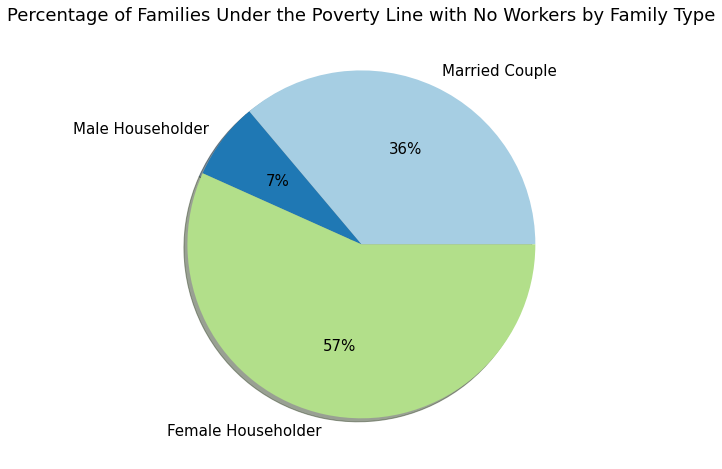

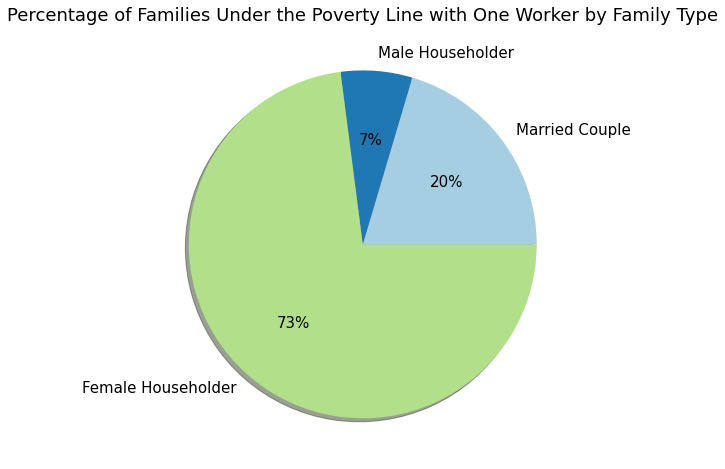

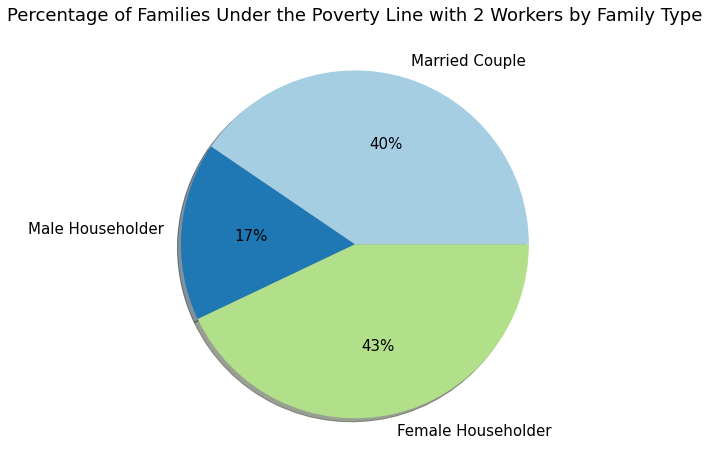

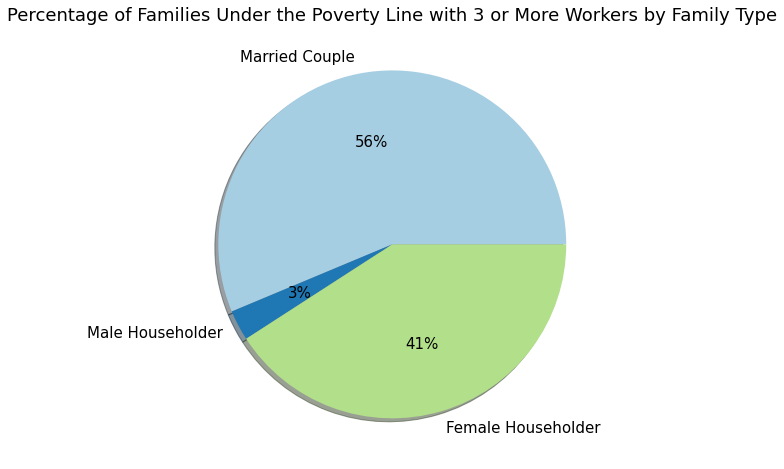

In [22]:
# below poverty
labels = ['Married Couple', 'Male Householder', 'Female Householder']

num_workers = ['No workers', '1 worker', '2 workers', '3 or more workers']
num_workers_title = ['No Workers', 'One Worker', '2 Workers', '3 or More Workers']

for i in range(len(num_workers)):
    data = [married_couple_poverty[num_workers[i]].mean(), male_householder_poverty[num_workers[i]].mean(),
                     female_householder_poverty[num_workers[i]].mean()]
    title = 'Percentage of Families Under the Poverty Line with ' + num_workers_title[i] + ' by Family Type'
    
    make_pie(data, labels, title)

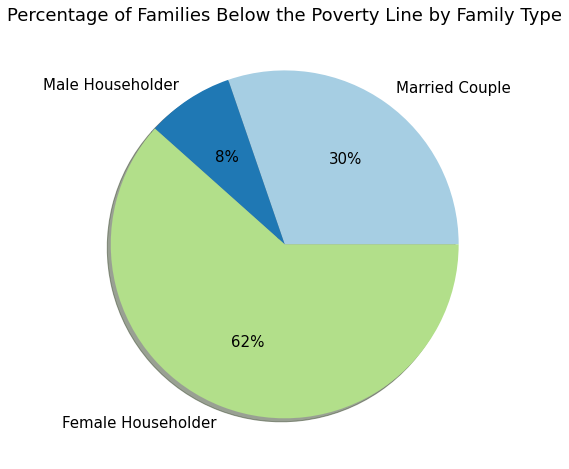

In [23]:
# on average below poverty
data = [married_couple_poverty['Married-couple family'].mean(),
        male_householder_poverty['Male householder, no spouse present'].mean(),
        female_householder_poverty['Female householder, no spouse present'].mean()]

make_pie(data, labels, 'Percentage of Families Below the Poverty Line by Family Type')

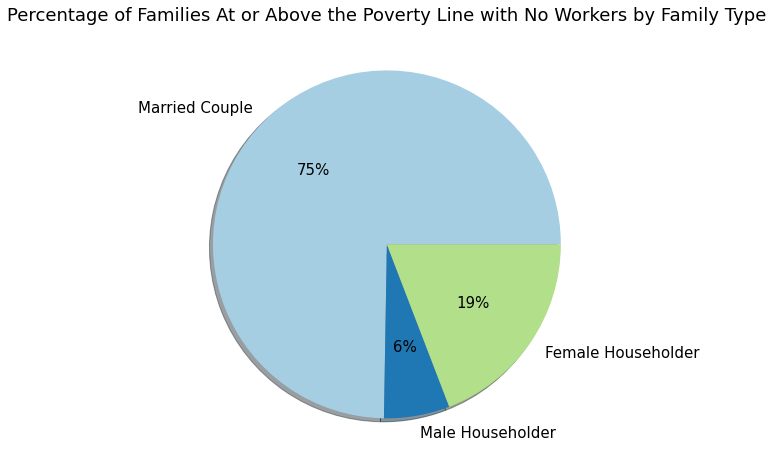

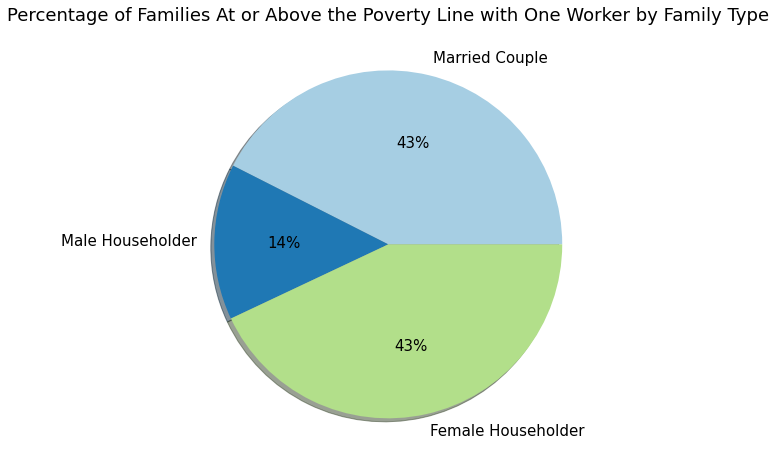

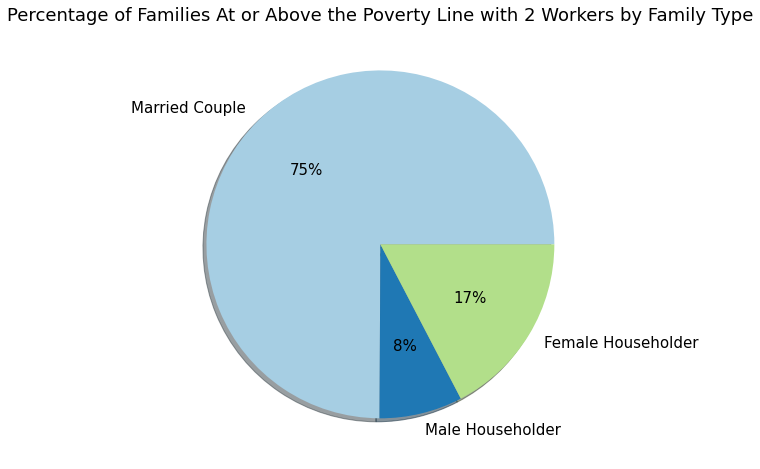

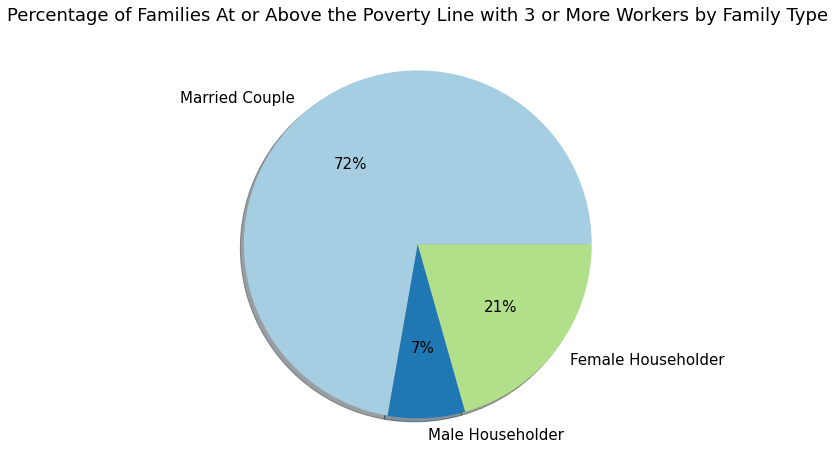

In [24]:
# at or above poverty
for i in range(len(num_workers)):
    data = [married_couple_above[num_workers[i]].mean(), male_householder_above[num_workers[i]].mean(),
                     female_householder_above[num_workers[i]].mean()]
    title = 'Percentage of Families At or Above the Poverty Line with ' + num_workers_title[i] + ' by Family Type'
    
    make_pie(data, labels, title)

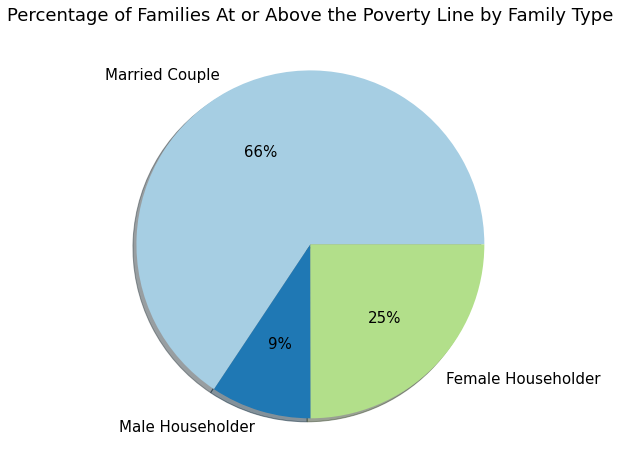

In [25]:
# on average at or above poverty
data = [married_couple_above['Married-couple family'].mean(),
        male_householder_above['Male householder, no spouse present'].mean(),
        female_householder_above['Female householder, no spouse present'].mean()]

make_pie(data, labels, 'Percentage of Families At or Above the Poverty Line by Family Type')

## B19121
This census table contains information on the median income of families by number of earners.

In [26]:
b19121 = pd.read_csv("data/B19121.csv").copy()
b19121.set_index('Label (Grouping)', inplace=True)
b19121.columns = [x.split('Census Tract ')[1].split(',')[0] for x in b19121.columns]
b19121.index = [x.strip().replace(":", "") for x in b19121.index]
b19121 = b19121.apply(lambda x: x.str.replace('%', '').str.replace('±', '').str.replace(',', ''), axis=1)
b19121 = b19121.T
for col in b19121.columns:
    b19121[col] = pd.to_numeric(b19121[col], errors='coerce')

print("Percentage of null values:")
print(b19121.isna().sum() / len(b19121.index))
b19121.head()

Percentage of null values:
Total                          0.178723
No earners (dollars)           0.646809
1 earner (dollars)             0.348936
2 earners (dollars)            0.238298
3 or more earners (dollars)    0.557447
dtype: float64


,Total,No earners (dollars),1 earner (dollars),2 earners (dollars),3 or more earners (dollars)
1.01,127188.0,NaN,213208.0,117007.0,199219.0
1.02,105131.0,25806.0,NaN,105313.0,118537.0
2.01,106364.0,35156.0,39779.0,130991.0,NaN
2.02,78567.0,NaN,25588.0,106121.0,210592.0
3.01,106637.0,105880.0,91923.0,97344.0,142143.0


In [27]:
bottom_income_total = b19121.sort_values(by=['Total'])['Total']
bottom_income_0 = b19121.sort_values(by=['No earners (dollars)'])['No earners (dollars)']
bottom_income_1 = b19121.sort_values(by=['1 earner (dollars)'])['1 earner (dollars)']
bottom_income_2 = b19121.sort_values(by=['2 earners (dollars)'])['2 earners (dollars)']
bottom_income_3 = b19121.sort_values(by=['3 or more earners (dollars)'])['3 or more earners (dollars)']

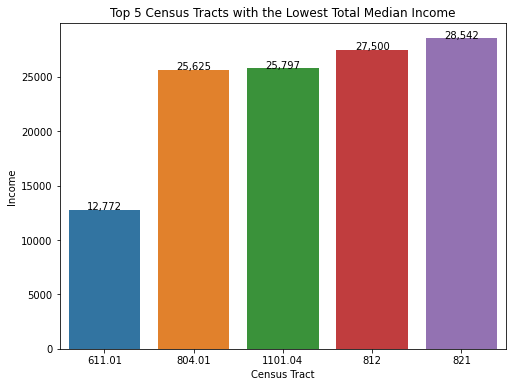

In [28]:
plt.figure(figsize=(8, 6))
xtotal = bottom_income_total[:5].index
ytotal = bottom_income_total[:5].values

ax = sns.barplot(data=b19121, x=xtotal, y=ytotal)
ax.set(xlabel='Census Tract', ylabel='Income', title='Top 5 Census Tracts with the Lowest Total Median Income')
add_labels(xtotal, ytotal)

plt.show()

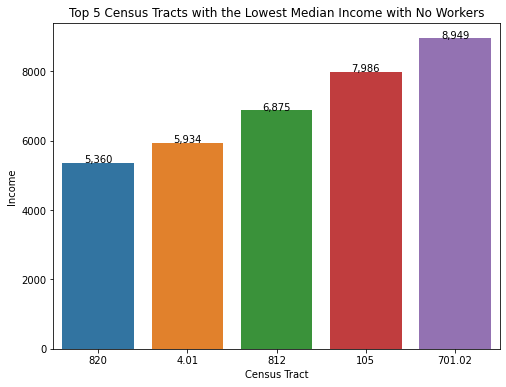

In [29]:
plt.figure(figsize=(8, 6))
x0 = bottom_income_0[:5].index
y0 = bottom_income_0[:5].values

ax = sns.barplot(data=b19121, x=x0, y=y0)
ax.set(xlabel='Census Tract', ylabel='Income', title='Top 5 Census Tracts with the Lowest Median Income with No Workers')
add_labels(x0, y0)

plt.show()

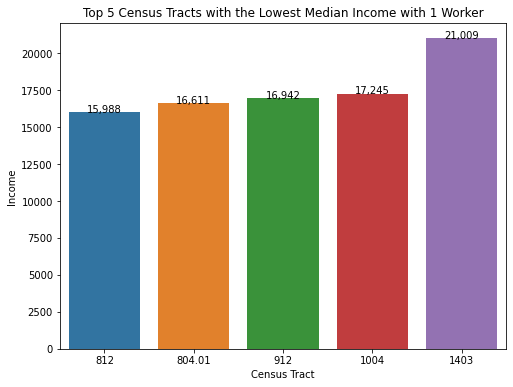

In [30]:
plt.figure(figsize=(8, 6))
x1 = bottom_income_1[:5].index
y1 = bottom_income_1[:5].values

ax = sns.barplot(data=b19121, x=x1, y=y1)
ax.set(xlabel='Census Tract', ylabel='Income', title='Top 5 Census Tracts with the Lowest Median Income with 1 Worker')
add_labels(x1, y1)

plt.show()

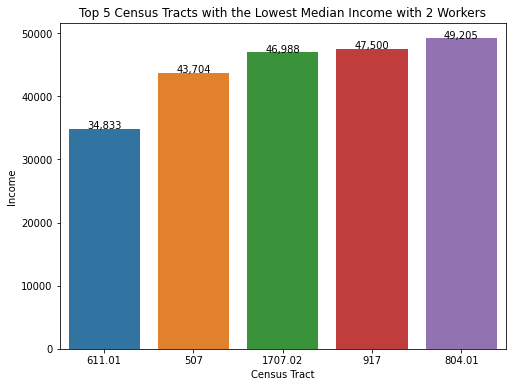

In [31]:
plt.figure(figsize=(8, 6))
x2 = bottom_income_2[:5].index
y2 = bottom_income_2[:5].values

ax = sns.barplot(data=b19121, x=x2, y=y2)
ax.set(xlabel='Census Tract', ylabel='Income', title='Top 5 Census Tracts with the Lowest Median Income with 2 Workers')
add_labels(x2, y2)

plt.show()

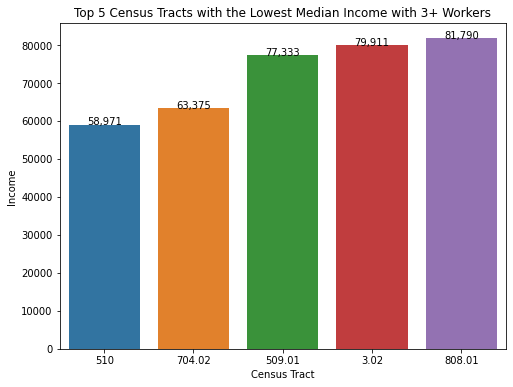

In [32]:
plt.figure(figsize=(8, 6))
x3 = bottom_income_3[:5].index
y3 = bottom_income_3[:5].values

ax = sns.barplot(data=b19121, x=x3, y=y3)
ax.set(xlabel='Census Tract', ylabel='Income', title='Top 5 Census Tracts with the Lowest Median Income with 3+ Workers')
add_labels(x3, y3)

plt.show()

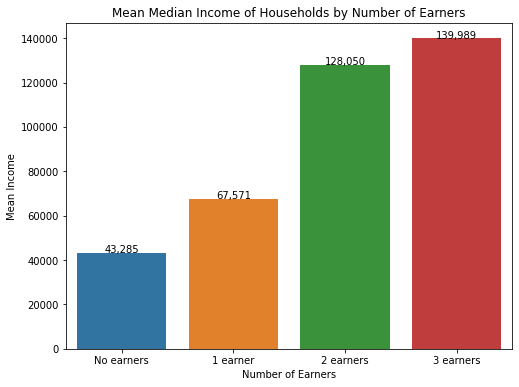

In [33]:
mean_income_0 = b19121['No earners (dollars)'].mean()
mean_income_1 = b19121['1 earner (dollars)'].mean()
mean_income_2 = b19121['2 earners (dollars)'].mean()
mean_income_3 = b19121['3 or more earners (dollars)'].mean()

x = ['No earners', '1 earner', '2 earners', '3 earners']
means = [mean_income_0, mean_income_1, mean_income_2, mean_income_3]

plt.figure(figsize=(8, 6))
ax = sns.barplot(data=b19121, x=x, y=means)
add_labels(x, means, len(means))
ax.set(xlabel='Number of Earners', ylabel='Mean Income', title='Mean Median Income of Households by Number of Earners')

plt.show()

**Issues:**
- We don't know how many people are in the family total, only the number of workers/earners